## Surgical Complications

Group Members:
    1) Theresa Aguilar
    2) Jeff Thornhill
    3) JoAnn Vuong

****Notes:** <br>
- In case this notebook is too big to run, a PDF version of this file is available in the Documents folder.<br>
- Final data set is called: nsqip_people.csv located in the Data_file folder. <br>

#### Import the necessary libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load the files into dataframes

In [2]:
#Inpatient
 
inpatient_raw = pd.read_csv('Data_Files/inpatient_master.csv', low_memory=False)

inpatient_raw.head(5)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000.0,0.0,6.119985e+08,6.119985e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Beneficiary

ben_2008_raw = pd.read_csv('Data_Files/master_2008_csv.csv', low_memory=False)
ben_2009_raw = pd.read_csv('Data_Files/master_2009_csv.csv', low_memory=False)
ben_2010_raw = pd.read_csv('Data_Files/master_2010_csv.csv', low_memory=False)

ben_raw = pd.concat([ben_2008_raw,ben_2009_raw,ben_2010_raw])

ben_raw.head(5)

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0000141F2FECE9BC,19740401,NaN,2,1,0,39,560,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000B27E77EE1987,19550201,NaN,1,1,0,32,80,12,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000C1386AE2C2A2,19591101,NaN,2,5,0,45,830,12,12,...,2,0.0,0.0,0.0,60.0,0.0,0.0,2400.0,820.0,0.0
3,0000EC65FBF94AB8,19370401,NaN,1,1,0,4,560,12,12,...,2,0.0,0.0,0.0,2600.0,960.0,0.0,1110.0,290.0,0.0
4,00020C9F73FD7F45,19430601,NaN,2,1,0,14,530,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#clean up unecessary variables from the script to create more memory
del ben_2008_raw
del ben_2009_raw
del ben_2010_raw

#### Data Profiling

In [5]:
# Data Profile analysis for Inpatient.
ip_dataprofile_results_df = pd.DataFrame([], columns = ["column_name", "col_count","unique_count","column_mode","null_count","null_pct"])
li = inpatient_raw.columns
row_num = inpatient_raw.shape[0]

for val in li:
  if inpatient_raw[val].count() == 0:
    column_name = val
    col_count = inpatient_raw[val].count()
    unique_count = len(pd.unique(inpatient_raw[val]))
    column_mode = inpatient_raw[val].mode()
    null_count = inpatient_raw[val].isnull().sum()
    null_pct = (null_count / null_count)*100
  else:
    column_name = val
    col_count = inpatient_raw[val].count()
    unique_count = len(pd.unique(inpatient_raw[val]))
    column_mode = inpatient_raw[val].mode()
    null_count = inpatient_raw[val].isnull().sum()
    null_pct = (null_count / row_num)*100         # Needs to be tweaked.
  stage = [column_name,col_count,unique_count,column_mode,null_count,null_pct]
  a_series = pd.Series(stage, index=ip_dataprofile_results_df.columns)
  ip_dataprofile_results_df = ip_dataprofile_results_df.append(a_series, ignore_index=True)

In [6]:
# Data Profile results inpatient.
pd.set_option("display.max_rows", None)

ip_dataprofile_results_df

,column_name,col_count,unique_count,column_mode,null_count,null_pct
0,DESYNPUF_ID,4008836,755214,0 91948E46E2DF89A1 dtype: object,0,0.000000
1,CLM_ID,4008836,1331533,0 90011100088330 1 90031100088821 ...,0,0.000000
2,SEGMENT,4008836,2,0 1 dtype: int64,0,0.000000
3,CLM_FROM_DT,4004965,1132,0 20080704.0 dtype: float64,3871,0.096562
4,CLM_THRU_DT,4004965,1097,0 20080709.0 dtype: float64,3871,0.096562
5,PRVDR_NUM,4008836,2895,0 23006G dtype: object,0,0.000000
6,CLM_PMT_AMT,4008836,100,0 4000.0 dtype: float64,0,0.000000
7,NCH_PRMRY_PYR_CLM_PD_AMT,4008836,78,0 0.0 dtype: float64,0,0.000000
8,AT_PHYSN_NPI,3968758,51188,0 9.011551e+09 dtype: float64,40078,0.999742
9,OP_PHYSN_NPI,2336006,47520,0 9.612911e+09 dtype: float64,1672830,41.728572


In [7]:
# Data Profile analysis for Beneficiary.
bene_dataprofile_results_df = pd.DataFrame([], columns = ["column_name", "col_count","unique_count","column_mode","null_count","null_pct"])
li = ben_raw.columns
row_num = ben_raw.shape[0]

for val in li:
  if ben_raw[val].count() == 0:
    column_name = val
    col_count = ben_raw[val].count()
    unique_count = len(pd.unique(ben_raw[val]))
    column_mode = ben_raw[val].mode()
    null_count = ben_raw[val].isnull().sum()
    null_pct = (null_count / null_count)*100
  else:
    column_name = val
    col_count = ben_raw[val].count()
    unique_count = len(pd.unique(ben_raw[val]))
    column_mode = ben_raw[val].mode()
    null_count = ben_raw[val].isnull().sum()
    null_pct = (null_count / row_num)*100         # Needs to be tweaked.
  stage = [column_name,col_count,unique_count,column_mode,null_count,null_pct]
  a_series = pd.Series(stage, index=bene_dataprofile_results_df.columns)
  bene_dataprofile_results_df = bene_dataprofile_results_df.append(a_series, ignore_index=True)

In [8]:
# Data Profile results beneficiary.
bene_dataprofile_results_df.head(5)

,column_name,col_count,unique_count,column_mode,null_count,null_pct
0,DESYNPUF_ID,15573396,2326856,0 0000438E79D01BEA 1 00015BF6509...,0,0.000000
1,BENE_BIRTH_DT,15573396,900,0 19431001 dtype: int64,0,0.000000
2,BENE_DEATH_DT,242991,37,0 20080901.0 dtype: float64,15330405,98.439704
3,BENE_SEX_IDENT_CD,15573396,2,0 2 dtype: int64,0,0.000000
4,BENE_RACE_CD,15573396,4,0 1 dtype: int64,0,0.000000


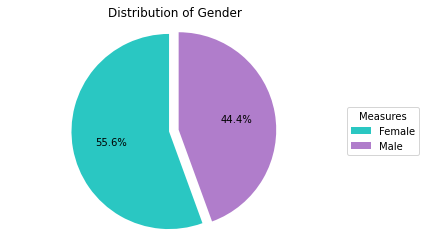

In [9]:
## ADD GRAPHS -

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Female','Male']
sizes = [1292861, 1033995]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#2AC7C2','#B07DCB','#EB5A5A','#FFD661','#ABC7FC']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Measures",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Gender')
plt.show()

Text(0.5, 0, 'Count')

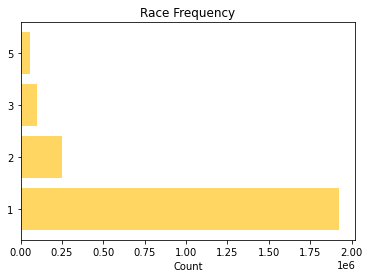

In [10]:
plt.barh(range(0,4), [1926708, 247723, 97972, 54453],
         color='#FFD661',
         tick_label=['1','2','3','5'])
plt.title("Race Frequency")
plt.xlabel("Count")

#### After reviewing the data profiling results, the columns that we found to be valuable and worth keeping are kept while the others are removed.

In [11]:
# Inpatient dataset after reviewing the data profiling results.
narrow_inpatient_raw = inpatient_raw[["DESYNPUF_ID","CLM_ID","SEGMENT","CLM_FROM_DT","CLM_THRU_DT","CLM_PMT_AMT","AT_PHYSN_NPI","CLM_ADMSN_DT","ADMTNG_ICD9_DGNS_CD",
"NCH_BENE_IP_DDCTBL_AMT","NCH_BENE_DSCHRG_DT","ICD9_DGNS_CD_1","ICD9_DGNS_CD_2","ICD9_DGNS_CD_3","ICD9_DGNS_CD_4","ICD9_DGNS_CD_5","ICD9_DGNS_CD_6","ICD9_DGNS_CD_7","ICD9_PRCDR_CD_1",
"ICD9_PRCDR_CD_2","ICD9_PRCDR_CD_3","ICD9_PRCDR_CD_4","ICD9_PRCDR_CD_5"]]

narrow_inpatient_raw.head(5)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,AT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,NCH_BENE_IP_DDCTBL_AMT,...,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,4000.0,3.139084e+09,20100312,4580,1100.0,...,V4501,4280,2720,4019,V4502,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,26000.0,6.476809e+09,20090412,7866,1068.0,...,5853,7843,2768,71590,2724,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,5000.0,6.119985e+08,20090831,6186,1068.0,...,56400,NaN,NaN,NaN,NaN,7092.0,6186,V5866,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,5000.0,4.971603e+09,20090917,29590,1068.0,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,16000.0,6.408400e+09,20100626,5849,1100.0,...,3542,V8801,78820,2639,7840,NaN,E8889,NaN,NaN,NaN


In [12]:
# Beneficiary dataset after reviewing the data profiling results.

ben_master = ben_raw[["DESYNPUF_ID","BENE_BIRTH_DT","BENE_DEATH_DT","BENE_SEX_IDENT_CD","BENE_RACE_CD"]]

ben_master.head(5)

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD
0,0000141F2FECE9BC,19740401,NaN,2,1
1,0000B27E77EE1987,19550201,NaN,1,1
2,0000C1386AE2C2A2,19591101,NaN,2,5
3,0000EC65FBF94AB8,19370401,NaN,1,1
4,00020C9F73FD7F45,19430601,NaN,2,1


#### Format the data

In [13]:
#Inpatient

narrow_inpatient_raw['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(narrow_inpatient_raw['NCH_BENE_DSCHRG_DT'].astype(float), format='%Y%m%d')
narrow_inpatient_raw['CLM_FROM_DT'] = pd.to_datetime(narrow_inpatient_raw['CLM_FROM_DT'].astype(float), format='%Y%m%d')
narrow_inpatient_raw['CLM_THRU_DT'] = pd.to_datetime(narrow_inpatient_raw['CLM_THRU_DT'].astype(float), format='%Y%m%d')
narrow_inpatient_raw['CLM_ADMSN_DT'] = pd.to_datetime(narrow_inpatient_raw['CLM_ADMSN_DT'].astype(float), format='%Y%m%d')

In [14]:
# Beneficiary

ben_master['BENE_BIRTH_DT'] = pd.to_datetime(ben_master['BENE_BIRTH_DT'].astype(float), format='%Y%m%d')
ben_master['BENE_DEATH_DT'] = pd.to_datetime(ben_master['BENE_DEATH_DT'].astype(float), format='%Y%m%d')

ben_master.rename(columns = {'BENE_BIRTH_DT':'BIRTH_DT','BENE_DEATH_DT':'DEATH_DT','BENE_SEX_IDENT_CD':'SEX_CD','BENE_RACE_CD':'RACE_CD'}, inplace=True)


#### Datasets

In [15]:
# Create a dataframe of unique DESYNPUF_IDs from beneficiary dataset.
ben_master_sorted = ben_master.sort_values(by=['DEATH_DT','DESYNPUF_ID'], ascending='True')
unique_ben = ben_master_sorted.drop_duplicates(subset = ["DESYNPUF_ID"])

# Create a dataframe of only the DESYNPUF_IDs who have a DEATH_DT.
dead_ben = unique_ben[unique_ben.DEATH_DT.notnull()]


#### Create the general and vascular surgery procedure list for filtering.

In [16]:
# Load the procedure code list provided by Ram.
proc_reference = pd.read_csv('Data_Files/surgery_flags_i9_2015.csv', low_memory=False)
proc_reference = proc_reference.rename(columns = {"'ICD-9-CM CODE'":'ICD9_PROCEDURE_CD',"'SURGERY FLAG'":'SURGERY_FLAG',"'ICD-9-CM CODE DESCRIPTION'":'ICD9_DX_DESCRIPTION'})

proc_reference.head(5)

,ICD9_PROCEDURE_CD,SURGERY_FLAG,ICD9_DX_DESCRIPTION
0,'0050','2',IMPLA RESYNCHR PACEMAKER W/0 (Begin 2002)
1,'0051','2',IMPLA RESYNCHRONIZATION DEFI (Begin 2002)
2,'0052','2',IMPL/REPL TRANSVENOUS LEAD L (Begin 2002)
3,'0053','2',IMPL/REPL PACEMAKER PLSE GE (Begin 2002)
4,'0054','2',IMPL/REPL DEFIBRIL GENERATOR (Begin 2002)


In [17]:
# Clean up procedure code list.

# Remove all quotes around the surgery flag number.
proc_reference['SURGERY_FLAG'] = proc_reference['SURGERY_FLAG'].str.replace(r"[\"\',]", '')
proc_reference['ICD9_PROCEDURE_CD'] = proc_reference['ICD9_PROCEDURE_CD'].str.replace(r"[\"\',]", '')


proc_reference2 = proc_reference[proc_reference['SURGERY_FLAG'] == '2']

# Creating the selected surgeries and turning them into a list.
proc_list = proc_reference2['ICD9_PROCEDURE_CD'].to_list()
rams_procedure_codes = [float(i) for i in proc_list] #converting string to float

proc_reference2.head(5)

,ICD9_PROCEDURE_CD,SURGERY_FLAG,ICD9_DX_DESCRIPTION
0,0050,2,IMPLA RESYNCHR PACEMAKER W/0 (Begin 2002)
1,0051,2,IMPLA RESYNCHRONIZATION DEFI (Begin 2002)
2,0052,2,IMPL/REPL TRANSVENOUS LEAD L (Begin 2002)
3,0053,2,IMPL/REPL PACEMAKER PLSE GE (Begin 2002)
4,0054,2,IMPL/REPL DEFIBRIL GENERATOR (Begin 2002)


In [18]:
# Applicable measure procedure codes.
procedure_codes = 46.0,46.01,46.02,46.03,46.04,46.13,46.23,46.20,45.76,45.03,45.41,45.42,45.43,45.71,45.72,45.73,45.74,45.75,45.81,45.82,45.83

#preparing the list of codes for next filter
P_codes = []
for number in procedure_codes:
    code = str(number).replace('.','')
    P_codes.append(code)
print(P_codes)

['460', '4601', '4602', '4603', '4604', '4613', '4623', '462', '4576', '4503', '4541', '4542', '4543', '4571', '4572', '4573', '4574', '4575', '4581', '4582', '4583']


In [19]:
# Concatenate the measure procedure code list with Ram's procedure codes.
our_proc_codes = ['46.0','4601.0','4602.0','4603.0','4604.0','4613.0','4623.0','4620.0','4576.0','4503.0','4541.0','4542.0','4543.0','4571.0','4572.0','4573.0','4574.0','4575.0', '4581.0','4582.0','4583.0','390.0','3913.0','3921.0','3922.0','3925.0','3926.0','3952.0','3964.0','3972.0','3978.0']

for i in rams_procedure_codes:
  if i in rams_procedure_codes != our_proc_codes:
    our_proc_codes.append(i)

In [20]:
del proc_reference

#### Denominator Calculation

In [21]:
# Filter the inpatient file with the identified procedure codes.
P_codes = our_proc_codes 

#Denominator file
inpatient_denominator = narrow_inpatient_raw[narrow_inpatient_raw['ICD9_PRCDR_CD_1'].isin(P_codes)|narrow_inpatient_raw['ICD9_PRCDR_CD_2'].isin(P_codes)| #filtering with P_codes
                                   narrow_inpatient_raw['ICD9_PRCDR_CD_3'].isin(P_codes)| narrow_inpatient_raw['ICD9_PRCDR_CD_4'].isin(P_codes)| 
                                   narrow_inpatient_raw['ICD9_PRCDR_CD_5'].isin(P_codes)]

# Add diagnosis and procedure flag if the row has a qualifying Dx or Px code.
inpatient_denominator['qualified_diagnosis'] = 0
inpatient_denominator['qualified_procedures'] = 1

inpatient_denominator.head(5)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,AT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,NCH_BENE_IP_DDCTBL_AMT,...,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,qualified_diagnosis,qualified_procedures
2,00016F745862898F,196661177015632,1,2009-08-31,2009-09-02,5000.0,6.119985e+08,2009-08-31,6186,1068.0,...,NaN,NaN,NaN,7092.0,6186,V5866,NaN,NaN,0,1
9,0007F12A492FD25D,196831176966961,1,2010-06-16,2010-06-19,29000.0,4.959466e+09,2010-06-16,99641,1100.0,...,2724,2720,53081,73.0,311,NaN,NaN,NaN,0,1
11,000C7486B11E7030,196641176984178,1,2008-10-15,2008-10-21,30000.0,5.520895e+09,2008-10-15,4260,1024.0,...,2720,78551,99591,50.0,4280,40390,5180,NaN,0,1
19,00157F1570C74E09,196381176974293,1,2009-06-26,2009-06-30,9000.0,7.360290e+09,2009-06-26,82100,1068.0,...,E8844,40390,27651,7935.0,NaN,NaN,NaN,NaN,0,1
26,001AFA59A08ABBF1,196331177006825,1,2008-06-21,2008-06-25,11000.0,9.771995e+09,2008-06-21,25080,NaN,...,3572,04185,72691,8622.0,70715,NaN,NaN,NaN,0,1


#### Numerator Calculation

In [22]:
# Filtering the inpatient dataset with the identified measure qualifying diagnosis codes.
D_codes = ('480','481','482','483','485','486','487','51881','51882','51884','7991','99591','99592','78552','390','45340','9972','9971','99749','9989','56962','460','4601','4602','4603','4604','4613','4623','4620','4576','4503','4541','4542','4543','4571','4572','4573','4574','4575','4581','4582','4583')

inpatient_numerator = narrow_inpatient_raw[narrow_inpatient_raw['ICD9_DGNS_CD_1'].isin(D_codes)|narrow_inpatient_raw['ICD9_DGNS_CD_2'].isin(D_codes)| #filtering DGNS columns with D_codes
                                   narrow_inpatient_raw['ICD9_DGNS_CD_3'].isin(D_codes)| narrow_inpatient_raw['ICD9_DGNS_CD_4'].isin(D_codes)| 
                                   narrow_inpatient_raw['ICD9_DGNS_CD_5'].isin(D_codes)]

inpatient_numerator['qualified_diagnosis'] = 1
inpatient_numerator['qualified_procedures'] = 0


In [23]:
#deleting unecessary variables from script to create memory
del inpatient_raw

#### Create a combined Numerator and Denominator Dataset

In [24]:
# Join the numerator and denominator.
readmission = pd.concat([inpatient_numerator,inpatient_denominator], ignore_index=True)

# Remove records that qualify in both the numerator and denominator datasets.
readmission = readmission.drop_duplicates(subset=['DESYNPUF_ID', 'NCH_BENE_DSCHRG_DT'])

readmission.head(5)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,AT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,NCH_BENE_IP_DDCTBL_AMT,...,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,qualified_diagnosis,qualified_procedures
0,00052705243EA128,196991176971757,1,2008-09-12,2008-09-12,14000.0,6.132011e+09,2008-09-12,78079,1024.0,...,2724,V4581,4019,NaN,NaN,NaN,NaN,NaN,1,0
1,00139C345A104F72,196691176984309,1,2009-12-07,2009-12-13,17000.0,9.894972e+09,2009-12-07,51881,1068.0,...,5184,99811,40391,9671.0,2724,49121,NaN,NaN,1,0
2,001EA2F4DB30F105,196601176970568,1,2009-07-19,2009-07-22,5000.0,5.439287e+09,2009-07-19,78097,1068.0,...,412,25000,27651,NaN,NaN,NaN,NaN,NaN,1,0
3,0021D4CDAFC0609F,196031176965445,1,2008-04-19,2008-04-23,5000.0,6.022999e+09,2008-04-19,486,1024.0,...,27651,2859,73313,9396.0,NaN,NaN,NaN,NaN,1,0
4,00271F7DF9C2B88A,196711177025513,1,2010-01-13,2010-01-14,28000.0,7.774054e+09,2010-01-13,78060,1100.0,...,2866,71106,4254,8345.0,34982,42843,NaN,NaN,1,0


#### Create custom columns needed in future calculations.

The discharge date from the previous record is put one row below it on the next most recent one claim the patient has. This pattern repeats until the patient no longer has encounters.

In [25]:
# Create a column to place the previous encounter discharge date by patient.
readmission['PreviousDischargeDTS'] = (readmission.sort_values(by=['DESYNPUF_ID','NCH_BENE_DSCHRG_DT'], ascending=True)
                       .groupby(['DESYNPUF_ID'])['NCH_BENE_DSCHRG_DT'].shift(1, axis=0))
readmission[['DESYNPUF_ID','CLM_ID','NCH_BENE_DSCHRG_DT','PreviousDischargeDTS']].head(5)

,DESYNPUF_ID,CLM_ID,NCH_BENE_DSCHRG_DT,PreviousDischargeDTS
0,00052705243EA128,196991176971757,2008-09-12,NaT
1,00139C345A104F72,196691176984309,2009-12-13,NaT
2,001EA2F4DB30F105,196601176970568,2009-07-22,NaT
3,0021D4CDAFC0609F,196031176965445,2008-04-23,NaT
4,00271F7DF9C2B88A,196711177025513,2010-01-14,NaT


Similar to discharge date, a patient's previous procedure is put on the following line (where applicable) so that it can be used to confirm if a patient qualifies as a NSQIP measure. This is determined when a qualifying diagnosis (in the list above) is on the same line as a previous qualifying procedure.

In [26]:
# Create a column to place the previous procedure on the next line if it is considered qualifying. Defined by the list of procedure codes above.
readmission['previous_qualified_procedures'] = (readmission.sort_values(by=['DESYNPUF_ID','NCH_BENE_DSCHRG_DT'], ascending=True)
                       .groupby(['DESYNPUF_ID'])['qualified_procedures'].shift(1, axis=0))


# Review the results.
readmission[['DESYNPUF_ID','qualified_diagnosis','qualified_procedures','previous_qualified_procedures']].head(5)

,DESYNPUF_ID,qualified_diagnosis,qualified_procedures,previous_qualified_procedures
0,00052705243EA128,1,0,NaN
1,00139C345A104F72,1,0,NaN
2,001EA2F4DB30F105,1,0,NaN
3,0021D4CDAFC0609F,1,0,NaN
4,00271F7DF9C2B88A,1,0,NaN


#### Calculate the number of days that elapsed between a patient's discharge dates.

In [27]:
# Creating a column with difference of days between claims.
readmission['difference_days'] = readmission['NCH_BENE_DSCHRG_DT'] - readmission['PreviousDischargeDTS']
readmission[['DESYNPUF_ID','CLM_ID','NCH_BENE_DSCHRG_DT','PreviousDischargeDTS','difference_days']].head(5)

,DESYNPUF_ID,CLM_ID,NCH_BENE_DSCHRG_DT,PreviousDischargeDTS,difference_days
0,00052705243EA128,196991176971757,2008-09-12,NaT,NaT
1,00139C345A104F72,196691176984309,2009-12-13,NaT,NaT
2,001EA2F4DB30F105,196601176970568,2009-07-22,NaT,NaT
3,0021D4CDAFC0609F,196031176965445,2008-04-23,NaT,NaT
4,00271F7DF9C2B88A,196711177025513,2010-01-14,NaT,NaT


In [28]:
# Creating a column that has 'x days' as a float (using a float rather than an int will take care of the NaN values).
readmission['days_float'] = readmission['difference_days'].dt.days.astype(float)

NSQIP is concerned about patients who had a qualifying procedure and came back with a qualifying diagnosis as long as it is within 30 days. Therefore, claims that have a gap in visits longer than 30 days are removed as well as same day claims.

In [29]:
# Filter the dataset by selecting the rows that have a difference in days between 1.0 and 30.0 days.
readmission_30days = readmission[(readmission['days_float'] >= 1.0) & (readmission['days_float'] <= 30.0)]

# Review the data after filtering.
readmission_30days[['DESYNPUF_ID','CLM_ID','NCH_BENE_DSCHRG_DT','PreviousDischargeDTS','difference_days']].head(5)

,DESYNPUF_ID,CLM_ID,NCH_BENE_DSCHRG_DT,PreviousDischargeDTS,difference_days
7,002AB71D3224BE66,196351177026160,2008-09-01,2008-08-12,20 days
18,007928DE5B0C4AA5,196601176961455,2010-01-18,2010-01-07,11 days
88,02D6BF1BB02FAC15,196881176959734,2008-07-24,2008-07-23,1 days
107,0342E8D226B4E3FC,196471177009155,2008-05-27,2008-05-18,9 days
150,046A3EAEF33204E1,196061177019627,2008-01-05,2008-01-03,2 days


**Are there patients that had died within 30 days from their procedure?**
 - In order to find this, we merged our beneficiary dataset with our readmission dataset. At which point, we created a column "Days before death" to count the number of days in order to see if there were any patients that died within 30 days of have a qualified surgery.

In [30]:
#Join the readmissions within 30 days with the beneficiary dataset of those who died.
readmission_death = pd.merge(readmission_30days,dead_ben, how='left', on='DESYNPUF_ID')

readmission_death['Days_Before_Death'] = (readmission_death['PreviousDischargeDTS'] - readmission_death['DEATH_DT']).dt.days.astype(float)

readmission_death_2 = readmission_death[(readmission_death['Days_Before_Death'] >= 1.0) & (readmission_death['Days_Before_Death'] <= 30.0)]

# Show the results. Any patients that come back would qualify as a NSQIP patient for dieing within 30 days of surgery.
readmission_death_2

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,AT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,NCH_BENE_IP_DDCTBL_AMT,...,qualified_procedures,PreviousDischargeDTS,previous_qualified_procedures,difference_days,days_float,BIRTH_DT,DEATH_DT,SEX_CD,RACE_CD,Days_Before_Death


**Findings:** There were no patients who died within 30 days of receiving a qualifying procedure.

Now that the datasets of those who had a qualifying diagnosis and a qualifying procedure have been merged. Filtered for only discharge dates that are within 30 days of each other, patients can be identified as a NSQIP individual if they have a 1 in the qualified_diagnosis column and a 1 in the qualified_procedure column.

In [31]:
# Create a NSQIP column based on the qualified diagnosis & previous qualified procedure.
readmission_30days['nsqip_person'] = readmission_30days['qualified_diagnosis'].astype(int) + readmission_30days['previous_qualified_procedures'].astype(int)
numerator = (readmission_30days['nsqip_person'] == 2).value_counts()
denominator = readmission_30days['DESYNPUF_ID'].count()

print(numerator)


False    18181
True      5111
Name: nsqip_person, dtype: int64


#### Calculate the overall rate of individuals who have been identified as a NSQIP patient as compared to everyone.

In [32]:
# Calculate the overall rate:
rate = numerator/denominator *100
rate

False    78.056844
True     21.943156
Name: nsqip_person, dtype: float64

#### Join in the beneficiary data so that patient demographic can be used with the main dataset. This is done using the DESYNPUF_ID as a join column between the two datasets.

In [33]:
# Bring in the patient information.
readmission_with_pat_info = pd.merge(readmission_30days,unique_ben, how='inner', on='DESYNPUF_ID') #Adding birth date, sex, and race from beneficiaries
readmission_with_pat_info.shape[0]

23292

**Findings:** The denominator count remained the same after joining in the beneficiary list so we know that we did not inadvertently increase our dataset size.

**Explore the NSQIP individuals**

In order to further understand the patients who were identified as a NSQIP patient, a dataset is created with just those who have a value of 2 in the nsquip_person column.

In [34]:
# View only the columns of interest.
readmission_with_pat_info[['DESYNPUF_ID','qualified_diagnosis','qualified_procedures','previous_qualified_procedures','nsqip_person']].head(5)

,DESYNPUF_ID,qualified_diagnosis,qualified_procedures,previous_qualified_procedures,nsqip_person
0,002AB71D3224BE66,1,0,1.0,2
1,007928DE5B0C4AA5,1,0,1.0,2
2,02D6BF1BB02FAC15,1,0,0.0,1
3,0342E8D226B4E3FC,1,0,1.0,2
4,046A3EAEF33204E1,1,0,0.0,1


In [35]:
# Create a dataframe of patients with a nsqip_person value equal to 2.

nsqip_people = readmission_with_pat_info[readmission_with_pat_info['nsqip_person'] == 2]

**Classify each NSQIP patient into their qualifying measure.**

Loop through different diagnosis code columns (1 - 7) to find which measure category each individual belongs to (i.e. uti, pneumonia, etc.)

In [36]:
from numpy import NaN
#ICD codes that we want to find
uti = ['390','5990']
sepsis = ['99591','99592','78552']
pneumonia = ['480','481','482','483','485','486','487','51881','51882','51884','7991']
colon = ['4299','4280','41511','45340','9972','9971','99749','9989','56962','43491','99702','486','99732','99739','6680']
deep_vein = ['453400','453900','453410','45342','9971','99749','99739','9972','9999','99771','41511','45340','9972','9971','99749','9989','56962']

#creating an empty list of our data
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_1']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_1"] = NSQIP_Measure


In [37]:
#creating an empty list of our data
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_2']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_2"] = NSQIP_Measure

In [38]:
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_3']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_3"] = NSQIP_Measure


In [39]:
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_4']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_4"] = NSQIP_Measure


In [40]:
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_5']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_5"] = NSQIP_Measure


In [41]:
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_6']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_6"] = NSQIP_Measure

In [42]:
NSQIP_Measure = []
for i in nsqip_people['ICD9_DGNS_CD_7']:
    if i in uti: 
        NSQIP_Measure.append('Urinary Tract Infection')
    elif i in sepsis: 
        NSQIP_Measure.append('Sepsis')
    elif i in pneumonia: 
        NSQIP_Measure.append('Pneumonia')
    elif i in colon: 
        NSQIP_Measure.append('Colon')
    elif i in (deep_vein): 
        NSQIP_Measure.append('deep_vein')
    else:
        NSQIP_Measure.append(NaN)

#using our list, we create a column in the dataframe with it
nsqip_people["NSQIP_Measure_7"] = NSQIP_Measure

#### Consolidate the newly created NSQIP_Measure_1-7 columns into 1 where all the rows will be populated.

In [43]:
# Create a column that summarizes the patient's qualifying diagnosis category.
nsqip_people['diagnosis'] = np.nan
nsqip_people['diagnosis'] = nsqip_people.diagnosis.fillna(nsqip_people.NSQIP_Measure_1).fillna(nsqip_people.NSQIP_Measure_2).fillna(nsqip_people.NSQIP_Measure_3).fillna(nsqip_people.NSQIP_Measure_4).fillna(nsqip_people.NSQIP_Measure_5).fillna(nsqip_people.NSQIP_Measure_6).fillna(nsqip_people.NSQIP_Measure_7)

**Findings**

In [44]:
# Frequency count of each diagnosis.
diagnosis_freq = nsqip_people['diagnosis'].value_counts()

# Total amount of people who have a matched diagnosis.
nsqip_people.shape[0]

# Creating a dataframe of the frequencies.
diagnosis_freq.to_frame()

# Diagnosis/diagnosis_total.
diagnosis_freq['diagnosis_total'] = nsqip_people.shape[0]

# Do a ratio of diagnosis/numerator (2000ish people)
diagnosis_freq['numerator_total'] = readmission_with_pat_info.shape[0]

diagnosis_freq

Pneumonia                   3542
Sepsis                       847
Colon                        515
Urinary Tract Infection      162
deep_vein                      8
diagnosis_total             5111
numerator_total            23292
Name: diagnosis, dtype: int64

#### Look at the breakdown of identified NSQIP individuals and how they are distributed across the various measures. In this particular instance, the denominator is the "numerator" and the individual measures are the numerator.

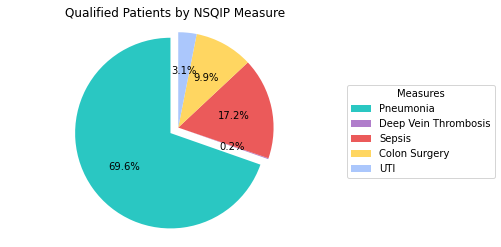

In [45]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Pneumonia','Deep Vein Thrombosis', 'Sepsis', 'Colon Surgery', 'UTI']
sizes = [3678, 8, 908, 524, 164]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#2AC7C2','#B07DCB','#EB5A5A','#FFD661','#ABC7FC']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels,
          title="Measures",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Qualified Patients by NSQIP Measure')
plt.show()

Text(0.5, 0, 'Row Count')

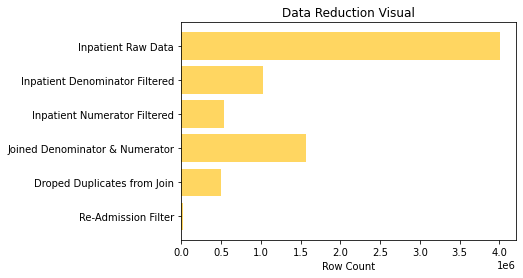

In [46]:
plt.barh(range(0,6), [23557,494344,1564154,533220,1030934,4008836],
         color='#FFD661',
         tick_label=["Re-Admission Filter","Droped Duplicates from Join",
                     "Joined Denominator & Numerator","Inpatient Numerator Filtered",
                     "Inpatient Denominator Filtered","Inpatient Raw Data"])
plt.title("Data Reduction Visual")
plt.xlabel("Row Count")

In [47]:
#Calculating the age for patients
readmission_with_pat_info['age'] = readmission_with_pat_info['NCH_BENE_DSCHRG_DT'] - readmission_with_pat_info['BIRTH_DT']
readmission_with_pat_info['age'] = (readmission_with_pat_info['age'].dt.days.astype(float))/365

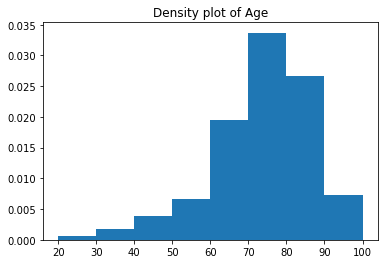

In [48]:
#Creating histogram of age range in dataset
bins = [20,30,40,50,60,70,80,90,100]
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(readmission_with_pat_info['age'], bins, density=True)
fig.canvas.draw()
plt.title('Density plot of Age')
plt.show()

In [49]:
nsqip_people.to_csv('nsqip_people.csv')

**Conclusion**

While we found patients who qualified for 5 of the 6 measures we sought after to find, the amount of data that is available through the CMS PUF files is not complete enough to submit to NSQIP. This project highlighted the plausiblity of building a dataset out and identifying patients who might fit the different measure defintions but that is the extent of this dataset. The other limitation with using the CMS files is that they are more than 10 years old and healthcare codes have changed from ICD9 diagnosis and procedure to ICD10 diagnosis and procedure. This means that the codes used in this analysis would not be transferrable directly but would rather need to be translated into the respective ICD-10 equivalents.